Import knihoven


In [184]:
from ultralytics import YOLO
import numpy as np
import cv2 
import cvzone
import time
import matplotlib.pyplot as plt


Import souboru se jmeny 

In [185]:
classesfile='coco.names'
classNames=[]
with open(classesfile,'rt') as f:
    classNames=f.read().rstrip('\n').split('\n')

Model

In [186]:
model = YOLO('yolov8m.pt')

Pokud chci hledat urcity objekt zjisti jeho id

In [187]:
searched_object = 'teddy bear'
object_id = classNames.index(searched_object)# zjisti class id objektu co hledam
print(object_id)

77


nacte a zobrazy zvoleny obrazek

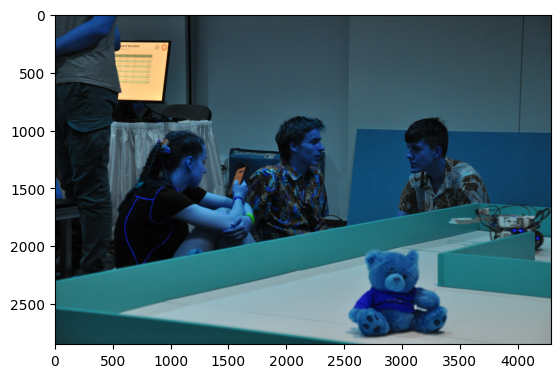

In [188]:
img = cv2.imread('obr3.jpg')
#cv2.imshow('picture',img)
#cv2.waitKey(2)
plt.imshow(img)

zjisti velikost obrazku 

In [189]:
img_height,img_width,img_channels = img.shape
print('width',img_width,'Px')
print('height',img_height,'Px')
print('channels',img_channels)

width 4288 Px
height 2848 Px
channels 3


pouziti modelu na nalezeni objektu

In [190]:
results = model(img)



0: 448x640 4 persons, 1 chair, 1 tv, 1 cell phone, 1 teddy bear, 364.0ms
Speed: 0.0ms preprocess, 364.0ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)


vykresleni jednotlivych objektu na obrazek

In [191]:
id0 = -1
id1 = -1
id2 = -1
id3 = -1
id4 = -1
id5 = -1
id6 = -1
id7 = -1
id8 = -1
id9 = -1
id10 = -1
id11 = -1
id12 = -1
id13 = -1
id14 = -1
id15 = -1
id16 = -1
id17 = -1
id18 = -1
id19 = -1
id20 = -1
n=0
for r in results:
        boxes = r.boxes
        for box in boxes:
            cls = int(box.cls[0])#zjisti classu objektu
            print(classNames[cls])#vypise klassu objektu slovem
            #print(cls) #vypise classu objektu jako id
            if n==0:
                id0=cls
            if n==1:
                id1=cls
            if n==2:
                id2=cls
            if n==3:
                id3=cls
            if n==4:
                id4=cls
            if n==5:
                id5=cls
            if n==6:
                id6=cls
            if n==7:
                id7=cls
            if n==8:
                id8=cls
            if n==9:
                id9=cls
            if n==10:
                id10=cls
            if n==11:
                id11=cls
            if n==12:
                id12=cls
            if n==13:
                id13=cls
            if n==14:
                id14=cls
            if n==15:
                id15=cls
            if n==16:
                id16=cls
            if n==17:
                id17=cls
            if n==18:
                id18=cls
            if n==19:
                id19=cls
            if n==20:
                id20=cls
            #bounding boxes
            x1,y1,x2,y2 = box.xyxy [0] #x1 je pozice leveho horniho rohu objektu v ose x, x2 je velikost objektu v ose x v px 
            x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)#prevedeni hodnot na int pro lepsi praci s nima 
            print('X=',x1,'Y=',y1,'W=',x2,'H=',y2)#vypisuje velikost objektu a jeho polohu v px 
            cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,255),3)#nakresli box okolo detekovane veci 
            #box on bounding box s nazvem claasy a confidence modelu 
            cvzone.putTextRect(img, f'{classNames[cls]}{rounded_conf}',(max(0,x1), max(35,y1)))#vykresli nazev classy objektu spolecne s confidence do videa 
            #object center 
            center_x,center_y = x1+(x2/2),y1+(y2/2)#vypocet stredu objektu pro lepsi lokalizaci medveda 
            center_x,center_y = int(center_x-x1/2), int(center_y-y1/2)#prevede hodnoty na int aby se dali pouzit ve funkci ukazujici stred 
            print('center:',center_x,center_y)#vypise udaje 
            cv2.circle(img, (center_x,center_y),10, (255,0,255), thickness=-1)
            #model confidence
            conf = box.conf[0]#jistota modelu 
            conf = float(conf*100)
            rounded_conf = int(conf)#zaokrouhli jistotu modelu na dve desetina mista 
            print('confidence:',rounded_conf)
            #vypocet odchylky objektu 
            object_deviation =0
            center_line = int(img_width/2)# x souradnice primky zobrazujici stred 
            death_zone = 50#ukazuje jak velke rozpeti v px se pocita jako stred 
            if (center_x > (center_line - death_zone)) and (center_x < (center_line + death_zone)): #pokud je objekt +-50px ve stredu je to brano jako ze je rovne 
                object_deviation = 0#odchylka objektu od stredu obrazovky
                print('deviation = ',object_deviation)
            if (center_x < (center_line - death_zone)) and (center_x > (center_line + death_zone)): #pokud je objekt +-50px od stredu zacne se pocitat odchylka -doprava +doleva 
                object_deviation = center_line-center_x #odchylka objektu od stredu obrazovky
                print('deviation = ',object_deviation) 
            #prevod odchylky do stupnu 
            #deviation_deg = float(object_deviation/100)
            #print(deviation_deg,"degrees")
            n=n+1
            #print(n)#optional 
cv2.line(img,(int(img_width/2),0),(int(img_width/2),img_height),(255,0,255),thickness=2 )#vykresli na video primku stredem videa 

teddy bear
X= 2526 Y= 2026 W= 3390 H= 2778
center: 2958 2402
confidence: 95
person
X= 1 Y= 4 W= 578 H= 2268
center: 289 1136
confidence: 94
person
X= 502 Y= 999 W= 1728 H= 2201
center: 1115 1600
confidence: 93
person
X= 2935 Y= 888 W= 3756 H= 1754
center: 3345 1321
confidence: 92
person
X= 1633 Y= 876 W= 2366 H= 1970
center: 1999 1423
confidence: 90
tvmonitor
X= 514 Y= 223 W= 1004 H= 780
center: 759 501
confidence: 86
chair
X= 919 Y= 774 W= 1354 H= 919
center: 1136 846
confidence: 50
cell phone
X= 1523 Y= 1285 W= 1663 H= 1510
center: 1593 1397
confidence: 49


array([[[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [ 37,  49,  51],
        [ 35,  47,  49],
        [ 31,  43,  45]],

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [ 34,  45,  49],
        [ 36,  47,  51],
        [ 37,  48,  52]],

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [ 34,  45,  49],
        [ 38,  49,  53],
        [ 37,  48,  52]],

       ...,

       [[ 16,  44,  51],
        [ 23,  51,  58],
        [ 23,  52,  57],
        ...,
        [144, 152, 151],
        [147, 155, 154],
        [146, 154, 153]],

       [[ 18,  46,  53],
        [ 21,  49,  56],
        [ 22,  51,  56],
        ...,
        [145, 153, 152],
        [148, 156, 155],
        [147, 155, 154]],

       [[ 16,  44,  51],
        [ 15,  43,  50],
        [ 19,  48,  53],
        ...,
        [148, 156, 155],
        [146, 157, 155],
        [147, 158, 156]]

vypise id nalezenych objektu 

In [192]:
if id0 > -1:
    print(id0)
if id1 > -1:
    print(id1)
if id2 > -1:
    print(id2)
if id3 > -1:
    print(id3)
if id4 > -1:
    print(id4)
if id5 > -1:
    print(id5)
if id6 > -1:
    print(id6)
if id7 > -1:    
    print(id7)
if id8 > -1:
    print(id8)
if id9 > -1:
    print(id9)
if id10 > -1:    
    print(id10)
if id11 > -1:    
    print(id11)
if id12 > -1:
    print(id12)
if id13 > -1:
    print(id13)
if id14 > -1:
    print(id14)
if id15 > -1:
    print(id15)
if id16 > -1:
    print(id16)
if id17 > -1:    
    print(id17)
if id18 > -1:
    print(id18)
if id19 > -1:
    print(id19)
if id20 > -1:
    print(id20)


77
0
0
0
0
62
56
67


hledani urciteho objektu

In [193]:
if id0==object_id or id1==object_id or id2==object_id or id3==object_id or id4==object_id or id5==object_id or id6==object_id or id7==object_id or id8==object_id or id9==object_id or id10==object_id or id11==object_id or id12==object_id or id13==object_id or id14==object_id or id15==object_id or id16==object_id or id17==object_id or id18==object_id or id19==object_id or id20==object_id:
    print('object found')

object found


ukaze obrazek

tensor([[2.5260e+03, 2.0262e+03, 3.3907e+03, 2.7790e+03, 9.5065e-01, 7.7000e+01],
        [1.6035e+00, 4.9150e+00, 5.7861e+02, 2.2687e+03, 9.4463e-01, 0.0000e+00],
        [5.0264e+02, 9.9909e+02, 1.7280e+03, 2.2018e+03, 9.3147e-01, 0.0000e+00],
        [2.9358e+03, 8.8828e+02, 3.7570e+03, 1.7550e+03, 9.2825e-01, 0.0000e+00],
        [1.6339e+03, 8.7664e+02, 2.3663e+03, 1.9710e+03, 9.0169e-01, 0.0000e+00],
        [5.1403e+02, 2.2377e+02, 1.0045e+03, 7.8099e+02, 8.6820e-01, 6.2000e+01],
        [9.1906e+02, 7.7431e+02, 1.3548e+03, 9.1922e+02, 5.0741e-01, 5.6000e+01],
        [1.5231e+03, 1.2858e+03, 1.6637e+03, 1.5103e+03, 4.9180e-01, 6.7000e+01]])


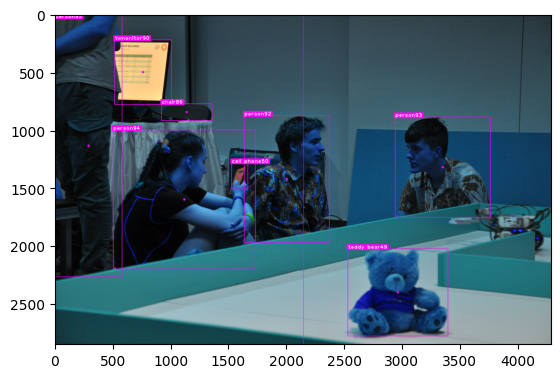

In [194]:
plt.imshow(img)
print(boxes.data)
